In [1]:
import librosa
import librosa.display
import os
import json
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy as sp

In [2]:
!ls /kaggle/input/speechcommands/Speech_Cmd/dataset

bird  cat  dog	down  go  happy  left  no  off	right  stop  tree  up  yes


In [3]:
cat =  '/kaggle/input/speechcommands/Speech_Cmd/dataset/cat/004ae714_nohash_0.wav'
dog = '/kaggle/input/speechcommands/Speech_Cmd/dataset/dog/00b01445_nohash_0.wav'
happy = '/kaggle/input/speechcommands/Speech_Cmd/dataset/happy/012c8314_nohash_0.wav'

In [4]:
ipd.Audio(cat)

In [5]:
dog,sr = librosa.load(dog)
cat,_ = librosa.load(cat)
happy,_ = librosa.load(happy)

#sample duration
sample_duration = 1/sr
print(f"Duration of 1 sample is:{sample_duration: .6f} seconds")

# duration of audio signal
duration = sample_duration * len(dog)
print(f"Duration of 1 sample is:{duration: .6f} seconds")

Duration of 1 sample is: 0.000045 seconds
Duration of 1 sample is: 1.000000 seconds


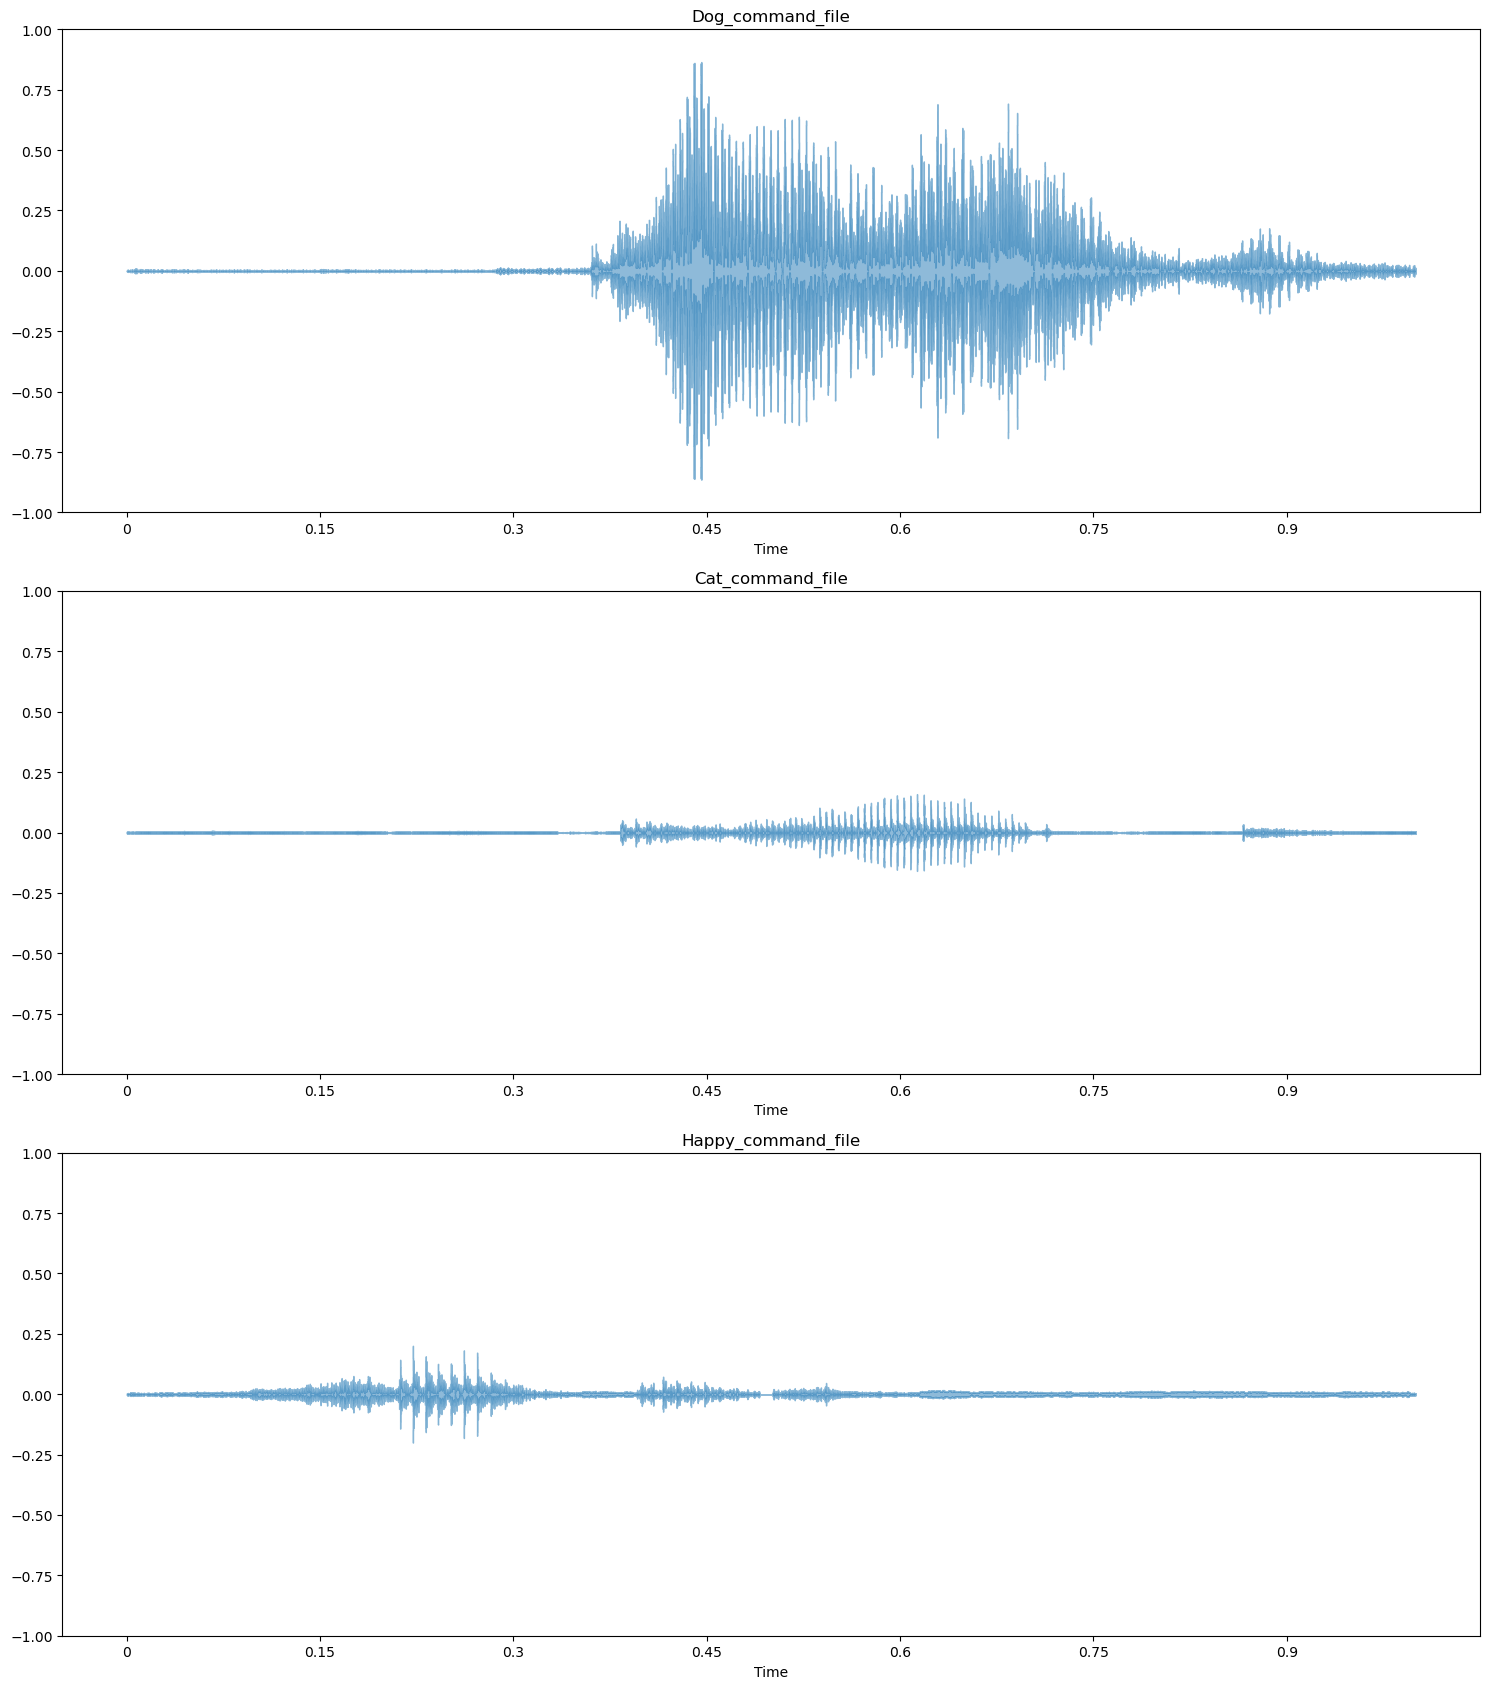

In [6]:
#Visualize Input data
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveshow(dog,alpha=0.5)
plt.ylim((-1,1))
plt.title('Dog_command_file')

plt.subplot(3,1,2)
librosa.display.waveshow(cat,alpha=0.5)
plt.title('Cat_command_file')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(happy,alpha=0.5)
plt.title('Happy_command_file')
plt.ylim((-1,1))

plt.tight_layout()
plt.show()

In [7]:
#fft --> Spectrum

fft_dog = np.fft.fft(dog)
fft_cat = np.fft.fft(cat)
fft_happy = np.fft.fft(happy)

magnitude_d = np.abs(fft_dog)
magnitude_c = np.abs(fft_cat)
magnitude_h = np.abs(fft_happy)

frequency_d = np.linspace(0,sr,len(magnitude_d))
frequency_c = np.linspace(0,sr,len(magnitude_c))
frequency_h = np.linspace(0,sr,len(magnitude_h))

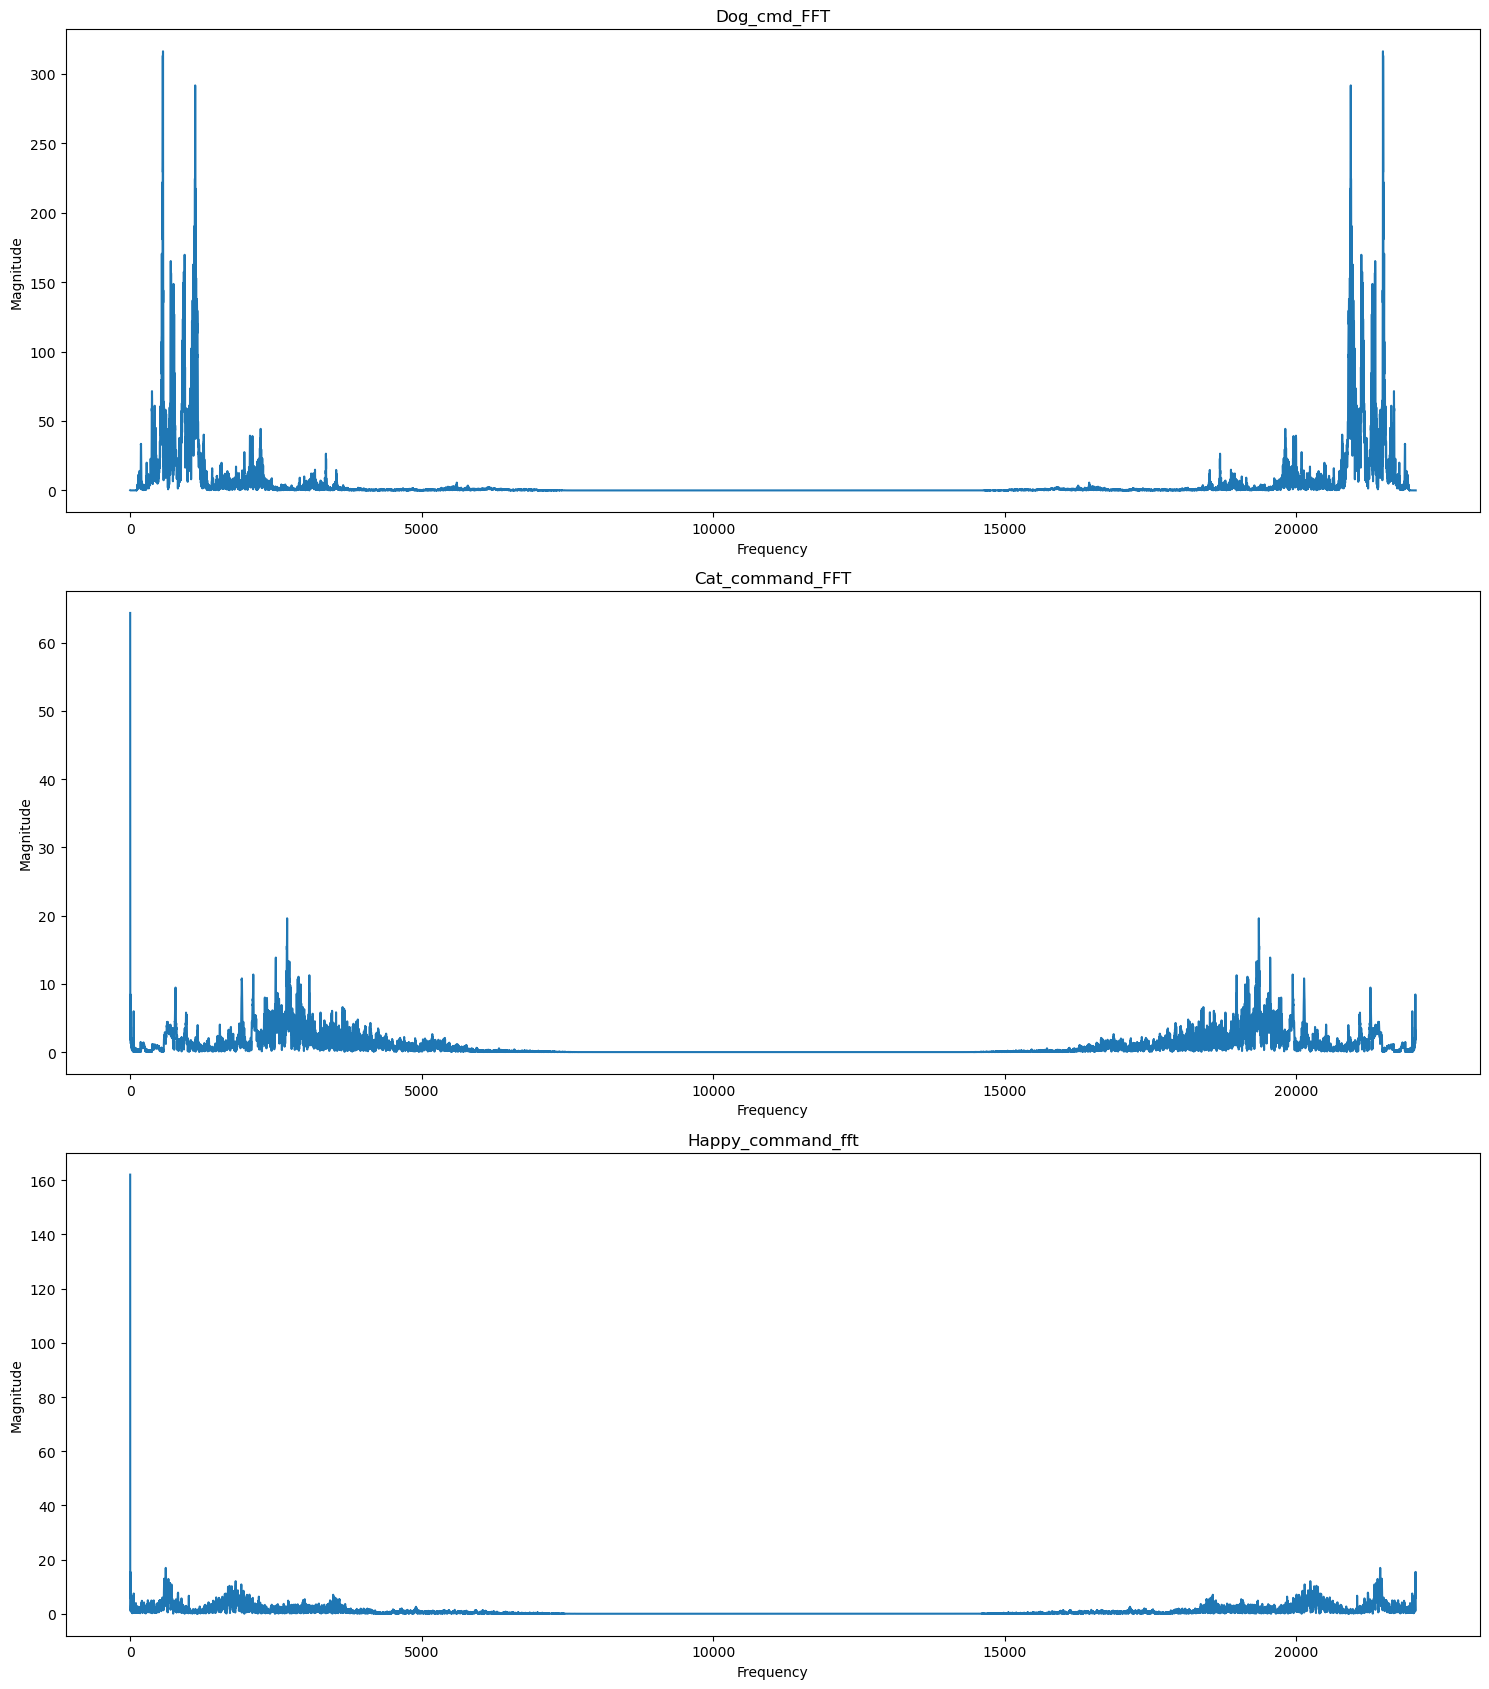

In [8]:
#Visualize Input data
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
plt.plot(frequency_d,magnitude_d)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
#plt.ylim((-1,1))
plt.title('Dog_cmd_FFT')

plt.subplot(3,1,2)
plt.plot(frequency_c,magnitude_c)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Cat_command_FFT')
#plt.ylim((-1,1))

plt.subplot(3,1,3)
plt.plot(frequency_h,magnitude_h)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Happy_command_fft')
#plt.ylim((-1,1))

plt.tight_layout()
plt.show()

In [9]:
#stft -- spectrogram

n_fft = 2048 #no.of.sample
hop_length = 512 #amount of shift h-fouriertransform

#dog
stft_d = librosa.core.stft(dog,hop_length=hop_length,n_fft=n_fft)
spectrogram_d = np.abs(stft_d)
#convert viewable form of low point
log_spectrogram_d = librosa.amplitude_to_db(spectrogram_d)

#cat
stft_c = librosa.core.stft(cat,hop_length=hop_length,n_fft=n_fft)
spectrogram_c = np.abs(stft_c)
#convert viewable form of low point
log_spectrogram_c = librosa.amplitude_to_db(spectrogram_c)

#happy
stft_h = librosa.core.stft(happy,hop_length=hop_length,n_fft=n_fft)
spectrogram_h = np.abs(stft_h)
#convert viewable form of low point
log_spectrogram_h = librosa.amplitude_to_db(spectrogram_h)

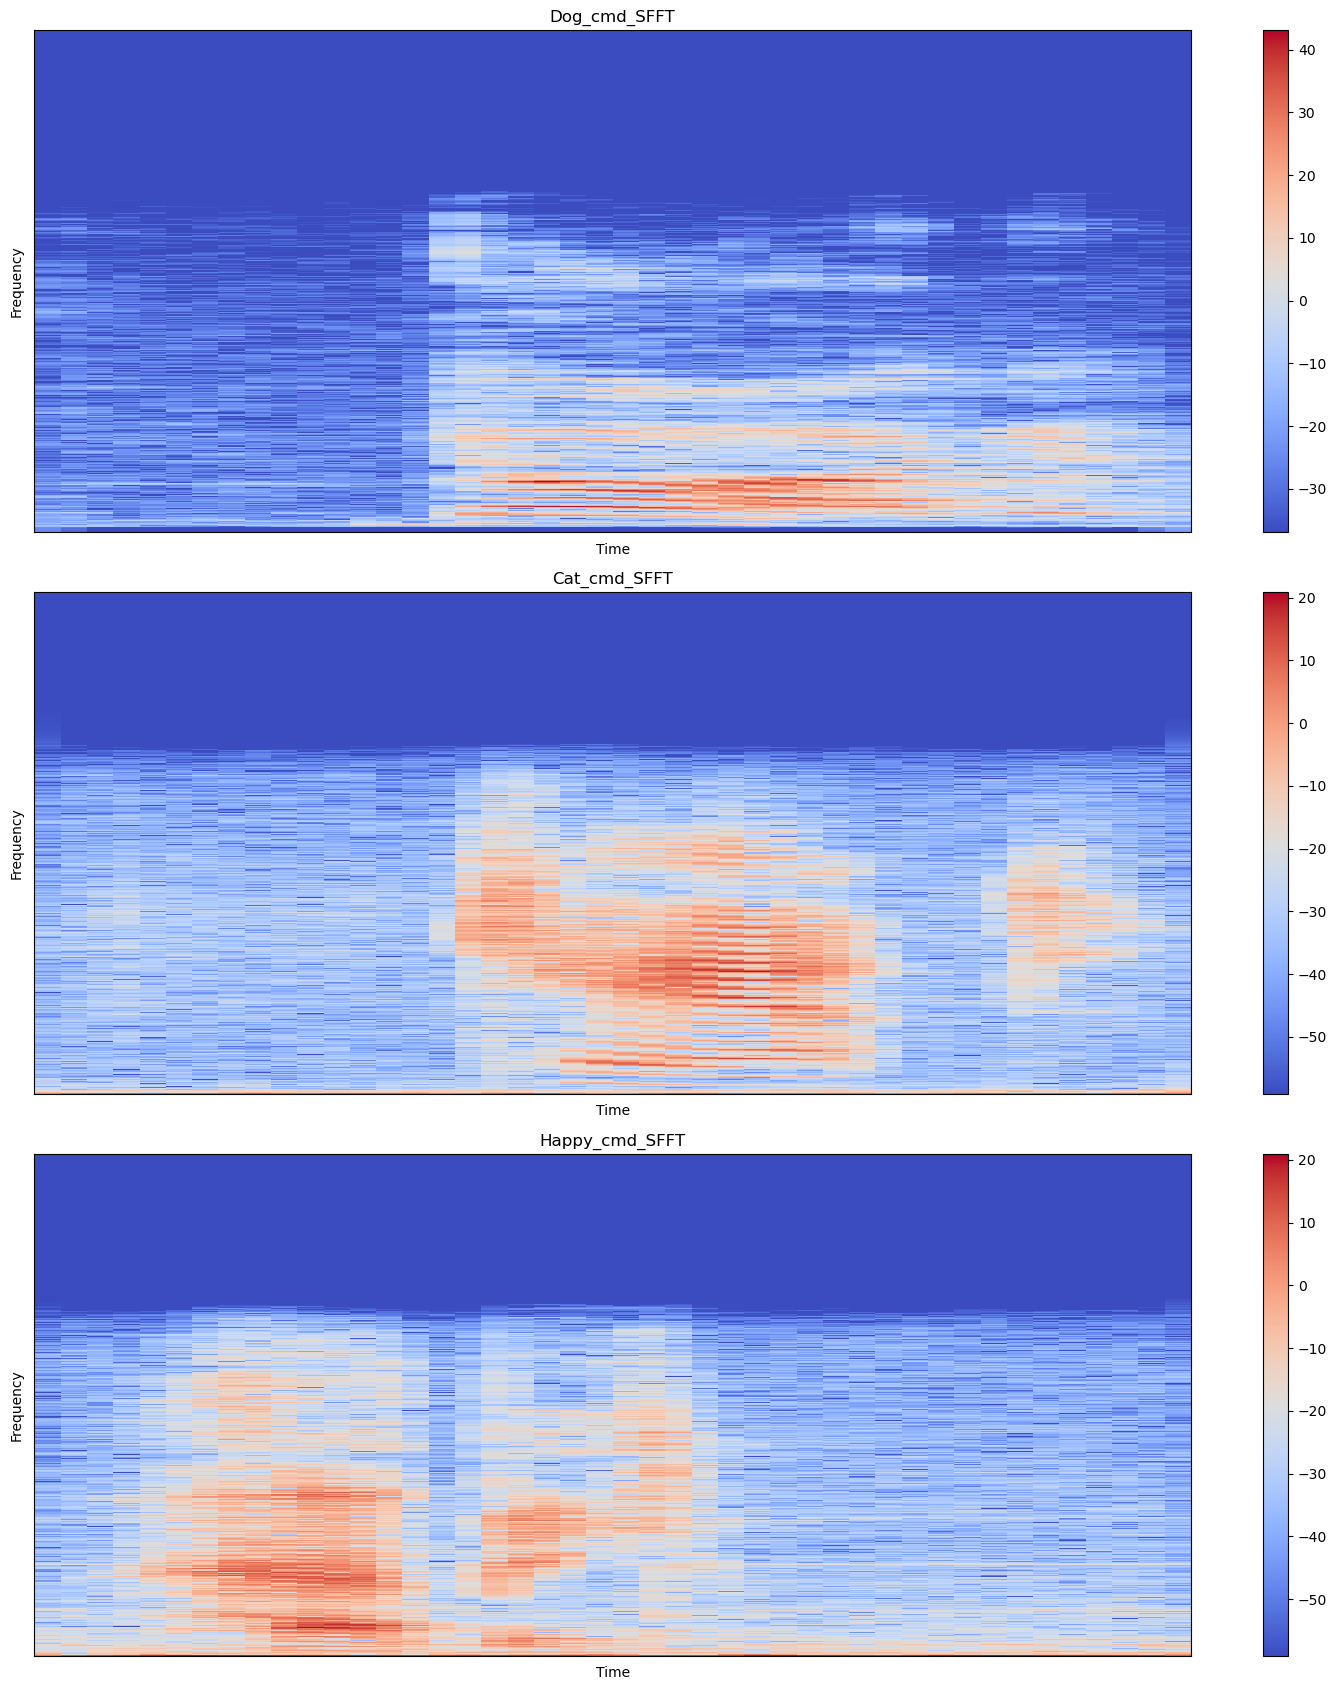

In [10]:
#Visualize Input data
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.specshow(log_spectrogram_d,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title('Dog_cmd_SFFT')

plt.subplot(3,1,2)
librosa.display.specshow(log_spectrogram_c,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title('Cat_cmd_SFFT')

plt.subplot(3,1,3)
librosa.display.specshow(log_spectrogram_h,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title('Happy_cmd_SFFT')

plt.tight_layout()
plt.show()

In [11]:
#MFCCS
#n_mfcc013= commonly using
MFFCS_d = librosa.feature.mfcc(y=dog,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)
MFFCS_c = librosa.feature.mfcc(y=cat,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)
MFFCS_h = librosa.feature.mfcc(y=happy,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)

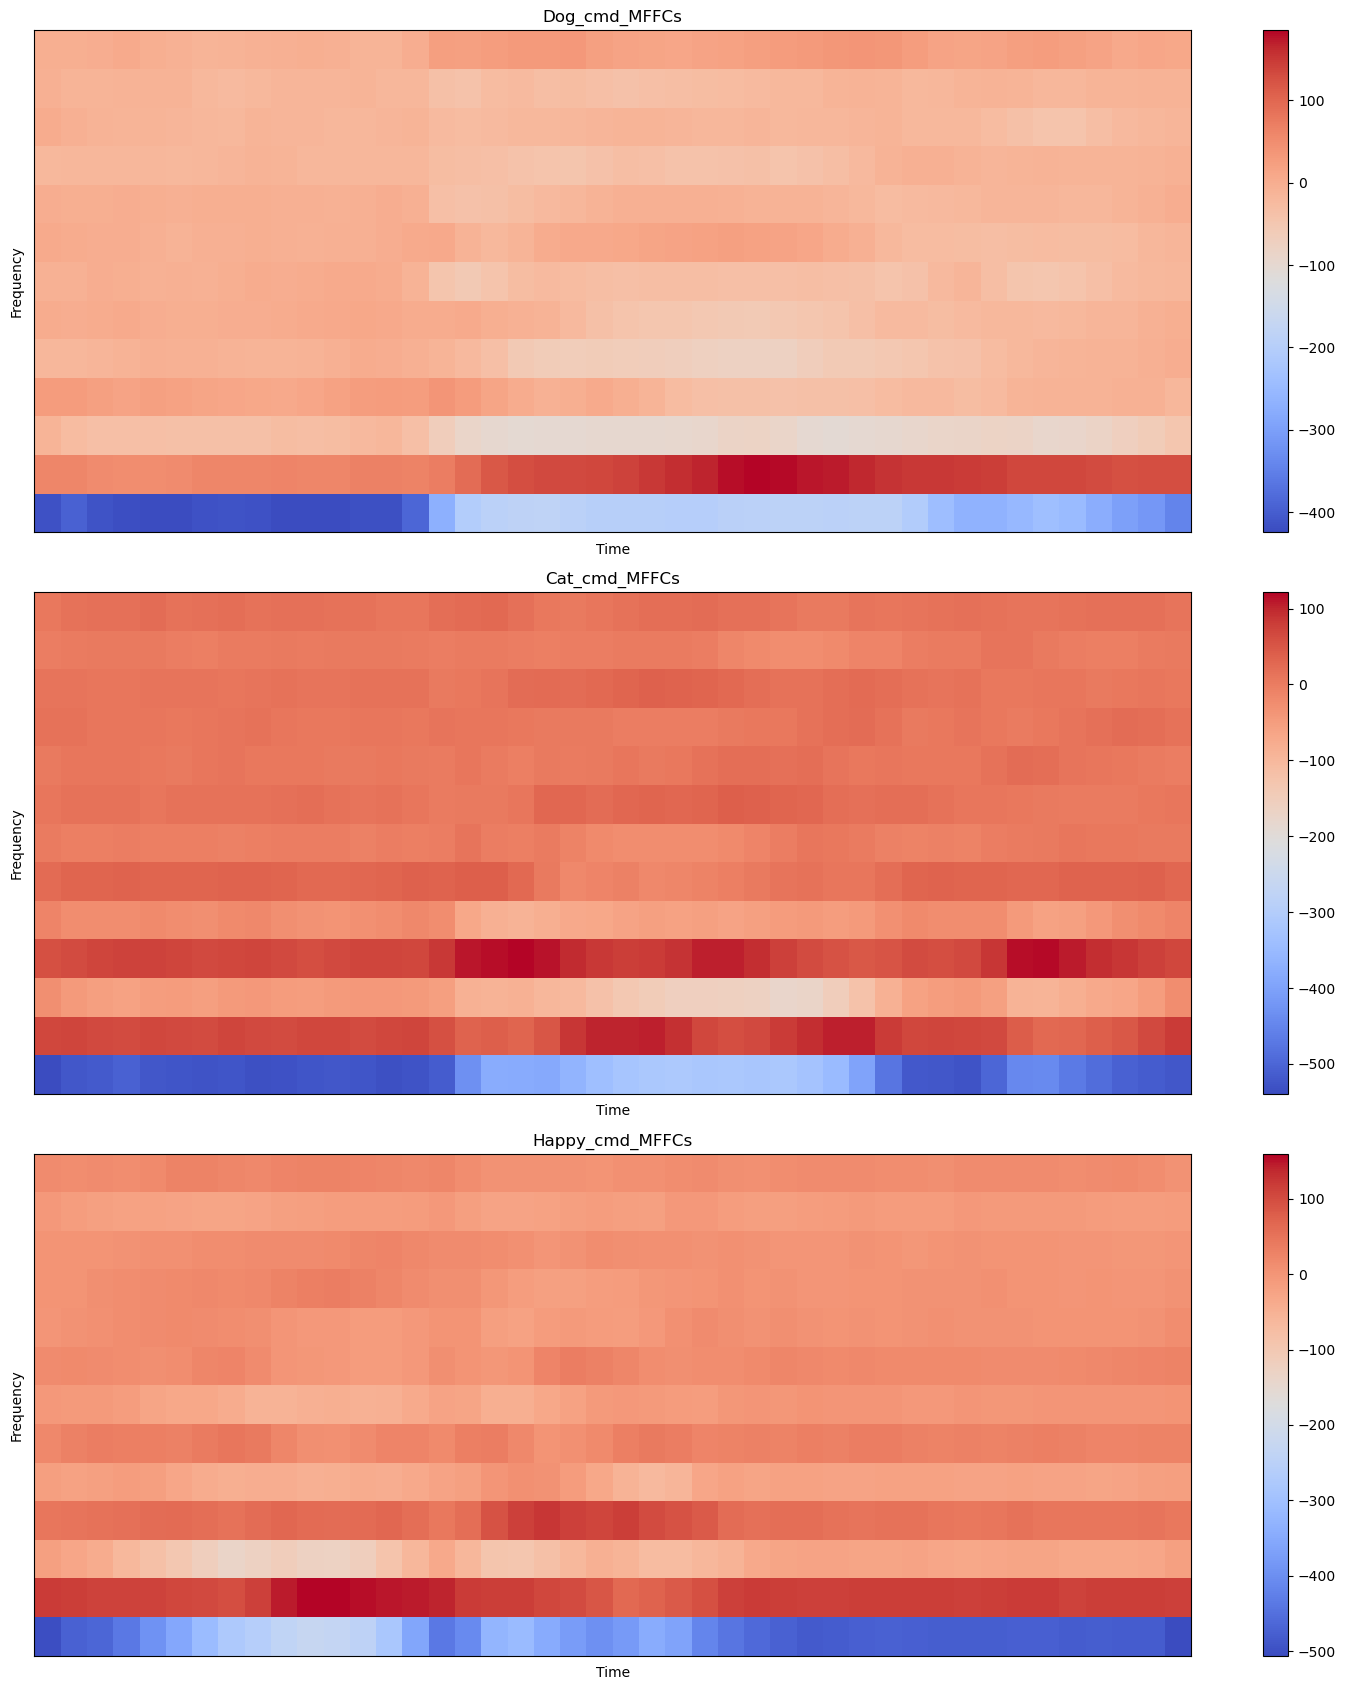

In [12]:
#Visualize Input data
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.specshow(MFFCS_d,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title('Dog_cmd_MFFCs')

plt.subplot(3,1,2)
librosa.display.specshow(MFFCS_c,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title('Cat_cmd_MFFCs')

plt.subplot(3,1,3)
librosa.display.specshow(MFFCS_h,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title('Happy_cmd_MFFCs')

plt.tight_layout()
plt.show()

In [13]:
DATASET_PATH = "/kaggle/input/speechcommands/Speech_Cmd/dataset"
JSON_PATH = "data.json"
SAMPLES_TO_CONSIDER = 22050 # 1 sec. of audio

In [14]:
def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
    """Extracts MFCCs from music dataset and saves them into a json file.

    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :return:
    """

    # dictionary where we'll store mapping, labels, MFCCs and filenames
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }
    
    # loop through all sub-dirs
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're at sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                
                # load audio file and slice it to ensure length consistency among different files
                signal, sample_rate = librosa.load(file_path)

                # drop audio files with less than pre-decided number of samples
                if len(signal) >= SAMPLES_TO_CONSIDER:

                    # ensure consistency of the length of the signal
                    signal = signal[:SAMPLES_TO_CONSIDER]

                    # extract MFCCs
                    MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                 hop_length=hop_length)
                    
                    # store data for analysed track
                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(i-1)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [15]:
preprocess_dataset(DATASET_PATH, JSON_PATH)


Processing: 'no'
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/97f4c236_nohash_3.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/cb2929ce_nohash_3.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/ad63d93c_nohash_1.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/aeb99b1c_nohash_1.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/c08585c1_nohash_4.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/9d32f10a_nohash_0.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/01648c51_nohash_1.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/df1d5024_nohash_2.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/e0315cf6_nohash_1.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/28497c5b_nohash_1.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/c22d3f18_nohash_0.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/d90b4138_nohash_4.wav: 0
/kaggle/input/speechcommands/Speech_Cmd/dataset/no/a1533da4_nohash_0.w

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [17]:
DATA_PATH = "/kaggle/working/data.json"
SAVED_MODEL_PATH = "model.h5"
EPOCHS = 75
BATCH_SIZE = 64
PATIENCE = 5
LEARNING_RATE = 0.001

In [18]:
def load_data(data_path):
    """Loads training dataset from json file.

    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets

    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!")
    return X, y

In [19]:
def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):

    # load dataset
    X, y = load_data(data_path)

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation, X_test, y_test

In [20]:
def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.001):

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))
    
    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))
    
     # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    # softmax output layer
    model.add(tf.keras.layers.Dense(14, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model

In [21]:
def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
  

    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history

In [22]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")
    print('')
    print('')
    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

In [23]:
def Build_Model():
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
    history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

    # plot accuracy/loss for training/validation set as a function of the epochs
    plot_history(history)

    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))
    
     # save model
    model.save(SAVED_MODEL_PATH)


Training sets loaded!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 42, 11, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 42, 11, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 6, 64)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 4, 32)         18464     
                                                                 
 batch_normalization_1 (Batc  (None, 19, 4, 32)        128       
 hNormalization)                                                 
                                  

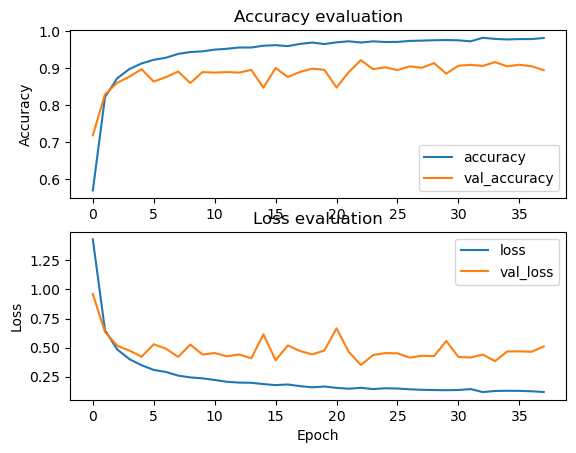

168/168 [==============================] - 1s 3ms/step - loss: 0.4573 - accuracy: 0.9056

Test loss: 0.45734888315200806, test accuracy: 90.56217670440674


In [24]:
Build_Model()

In [25]:
SAVED_MODEL_PATH = "/kaggle/working/model.h5"
SAMPLES_TO_CONSIDER = 22050

In [26]:
DATA_PATH

'/kaggle/working/data.json'

In [27]:
class _Keyword_Spotting_Service:

    model = None
    _mapping = [
        "no",
        "right",
        "off",
        "yes",
        "dog",
        "left",
        "bird",
        "go",
        "tree",
        "down",
        "stop",
        "up",
        "happy",
        "cat",
            ]
    _instance = None
    
    
    def predict(self, file_path):

        # extract MFCC
        MFCCs = self.preprocess(file_path)

        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = self.model.predict(MFCCs)
        predicted_index = np.argmax(predictions)
        predicted_keyword = self._mapping[predicted_index]
        return predicted_keyword
    
    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512):
        # load audio file
        signal, sample_rate = librosa.load(file_path)

        if len(signal) >= SAMPLES_TO_CONSIDER:
            # ensure consistency of the length of the signal
            signal = signal[:SAMPLES_TO_CONSIDER]

            # extract MFCCs
            MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        return MFCCs.T
    
    


In [28]:
def Keyword_Spotting_Service():

    # ensure an instance is created only the first time the factory function is called
    if _Keyword_Spotting_Service._instance is None:
        _Keyword_Spotting_Service._instance = _Keyword_Spotting_Service()
        _Keyword_Spotting_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Keyword_Spotting_Service._instance

In [29]:
# create 2 instances of the keyword spotting service
kss = Keyword_Spotting_Service()
kss1 = Keyword_Spotting_Service()
# check that different instances of the keyword spotting service point back to the same object (singleton)
assert kss is kss1

# make a prediction
keyword = kss.predict("/kaggle/input/yesoiu/recorded_audio1.wav")
keyword1 = kss.predict("/kaggle/input/downnn/recorded_audio2.wav")



1/1 [==============================] - 0s 42ms/step


In [30]:
print(f'The First_given_input_yes: The Predict output is {keyword}')
print(f'The Second_given_input_down: The Predict output is {keyword1}')

The First_given_input_yes: The Predict output is off
The Second_given_input_down: The Predict output is down
